In [ ]:
!pip install numpy matplotlib pillow tensorflow


In [ ]:

!pip install kaggle
from google.colab import files
files.upload()# Upload 'kaggle.json' file with API credentials


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# download dataset
!kaggle datasets download -d asdasdasasdas/garbage-classification


Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
 89% 73.0M/82.0M [00:01<00:00, 49.8MB/s]
100% 82.0M/82.0M [00:01<00:00, 49.3MB/s]


In [ ]:
# unzip dataset
!unzip garbage-classification.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: /content/dataset/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inf

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset path
base_dir = '/content/dataset/garbage classification/Garbage classification'

# create data generator (data augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # resalce
    rotation_range=30,  # rotate from -03 to 30 degree
    width_shift_range=0.2,  # shift in width
    height_shift_range=0.2,  # shift in height
    shear_range=0.15,  # shear
    zoom_range=0.2,  # ramdonly zoom
    fill_mode='nearest',  # fill by nearest (actually no NA)
    validation_split=0.2  # splite 20% as validiation data
)

# name classes (as raw data has)
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
batch_size = 32
# train data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # resize
    batch_size=32,  # batch size
    classes=classes,  # class name
    class_mode='categorical',  # categorical mode
    subset='training'  # get train data
)

# validation data generator
validation_datagen = ImageDataGenerator(
    rescale=1./255,  # rescale
    validation_split=0.2  # gain validation data
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    classes=classes,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:

# 2. construct model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. train model
epochs = 30
# steps_per_epoch = len(train_files) // batch_size
# validation_steps = len(val_files) // batch_size

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# save model
model.save('waste_classification_model.h5')




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 548ms/step - accuracy: 0.5228 - loss: 1.2758 - val_accuracy: 0.7018 - val_loss: 0.7378
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 382ms/step - accuracy: 0.8041 - loss: 0.5532 - val_accuracy: 0.7137 - val_loss: 0.7401
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - accuracy: 0.8171 - loss: 0.4813 - val_accuracy: 0.7356 - val_loss: 0.6803
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.8655 - loss: 0.3859 - val_accuracy: 0.7634 - val_loss: 0.6823
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.8844 - loss: 0.3403 - val_accuracy: 0.7495 - val_loss: 0.7414
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 375ms/step - accuracy: 0.8778 - loss: 0.3117 - val_accuracy: 0.7475 - val_loss: 0.7536
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 358ms/step - accuracy: 0.9098 - loss: 0.2554 - val_accuracy: 0.7932 - val_loss: 0.6351
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 362ms/step - accuracy: 0.9005 - loss: 0.2611 - val_accuracy: 0.755

Found 2527 images belonging to 6 classes.


79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.9289 - loss: 0.2675
Test Loss: 0.18924975395202637
Test Accuracy: 0.946972668170929
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       1.00      0.94      0.97       403
       glass       0.93      0.92      0.93       501
       metal       0.95      0.97      0.96       410
       paper       0.96      0.99      0.97       594
     plastic       0.90      0.93      0.92       482
       trash       0.94      0.87      0.90       137

    accuracy                           0.95      2527
   macro avg       0.95      0.94      0.94      2527
weighted avg       0.95      0.95      0.95      2527

Confusion Matrix:
[[380   1   4  11   1   6]
 [  0 460   8   2  31   0]
 [  0   5 398   3   4   0]
 [  1   1   2 586   3   1]
 [  0  22   5   4 450   1]
 [  0   3   1   5   9 119]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


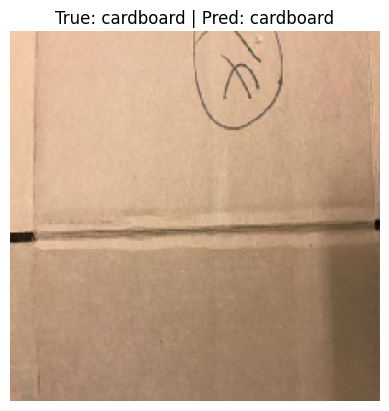

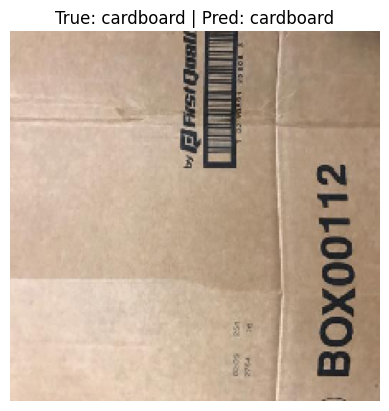

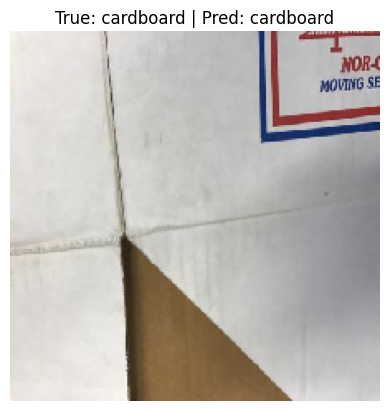

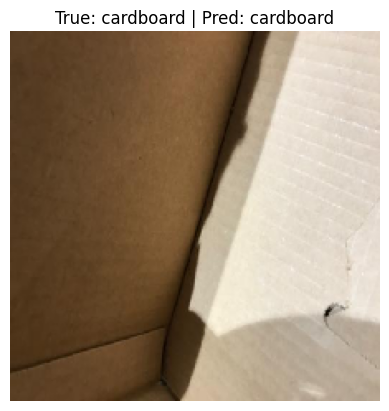

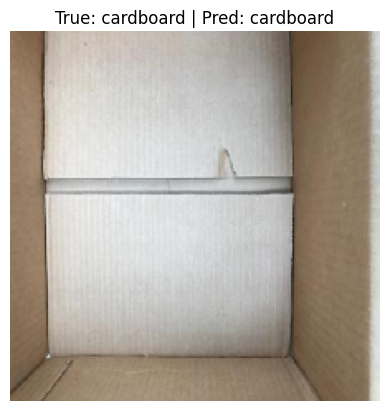

In [ ]:



# 4. gain test data
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# generate test data
test_generator = test_datagen.flow_from_directory(
    base_dir,  # test data path
    target_size=(224, 224),
    batch_size=32,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)

# 5. calculate loss and accuracy in test data
model = load_model('waste_classification_model.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# 6. product confusion matrix and prediction report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

# 7. visulize results
def visualize_predictions(generator, classes, num_images=5):
    # Get a batch of data from the generator
    images, labels = next(generator)
    # Make predictions for the batch
    predictions = model.predict(images)

    for i in range(num_images):
        # Display the image
        plt.imshow(images[i])
        plt.axis('off')

        # Get true and predicted classes
        true_class = classes[np.argmax(labels[i])]  # True label from the batch
        pred_class = classes[np.argmax(predictions[i])]  # Predicted label

        # Show title with true and predicted labels
        plt.title(f"True: {true_class} | Pred: {pred_class}")
        plt.show()


visualize_predictions(test_generator, classes)


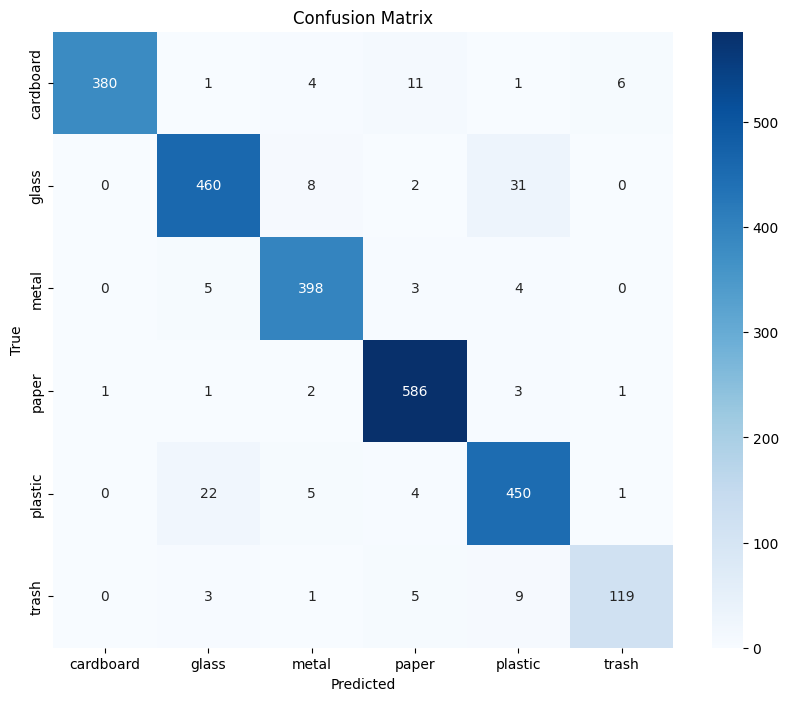

In [ ]:
# Plot Confusion Matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# # Load the model for prediction
# model = load_model('waste_classification_model.h5')
# class_indices = train_generator.class_indices
# class_labels = dict((v, k) for k, v in class_indices.items())

# def predict_image(img_path):
#     img = Image.open(img_path).convert('RGB').resize((224, 224))
#     img_array = np.array(img) / 255.0
#     img_array = np.expand_dims(img_array, axis=0)

#     predictions = model.predict(img_array)
#     predicted_class = np.argmax(predictions, axis=1)[0]
#     class_name = class_labels[predicted_class]
#     print(f'The waste is classified as: {class_name}')
#     return class_name

# # Suggested recycling bins
# recycling_bins = {
#     'paper': 'Paper recycling bin',
#     'plastic': 'Plastic recycling bin',
#     'metal': 'Metal recycling bin',
#     'glass': 'Glass recycling bin',
#     'organic': 'Organic waste bin',
#     'cardboard': 'Cardboard recycling bin',
#     'trash': 'General waste bin'
# }

# def suggest_bin(class_name):
#     bin_name = recycling_bins.get(class_name, 'General waste bin')
#     print(f'Please place this item into: {bin_name}')
#     return bin_name

# # Combined function
# def classify_and_suggest(img_path):
#     class_name = predict_image(img_path)
#     bin_name = suggest_bin(class_name)
#     return class_name, bin_name

# # Example usage
# img_path = '/content/glass1.jpg'  # Replace with the path to the image you want to predict
# class_name, bin_name = classify_and_suggest(img_path)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('waste_classification_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('waste_classification_model.tflite', 'wb') as f:
  f.write(tflite_model)

print("Model converted successfully to waste_classification_model.tflite")

Saved artifact at '/tmp/tmpm82_rk9g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133864803886960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804847808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804845344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804844288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804846576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804850800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804851152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804852560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804849040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804850448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133864804854848